In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/chanyoung/Desktop/Neural-GC-master/lorenz_96_10_10_1000.csv')

In [5]:
X = df['a'].values

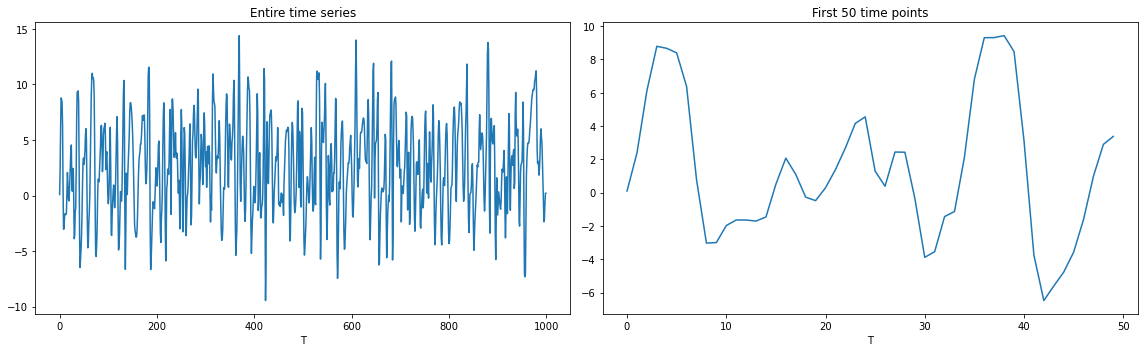

In [8]:
# Plot data
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].plot(X)
axarr[0].set_xlabel('T')
axarr[0].set_title('Entire time series')
axarr[1].plot(X[:50])
axarr[1].set_xlabel('T')
axarr[1].set_title('First 50 time points')
plt.tight_layout()
plt.show()

In [80]:
class RBFtimenet(object):
    # This is one layer RBFnn
    def __init__(self, timelag = 10, lr = 0.01, epochs = 100, inferStds = True, seed = 1234):
        self.lr = lr
        self.epochs = epochs
        self.inferStds = inferStds
        self.seed = seed
        self.timelag = timelag
        np.random.seed(self.seed)


    def cluster(self, X):
        # simple cluster means and stds list about time series data
        clusters = [np.mean(x) for x in X]
        stds = [np.std(x) for x in X]

        return clusters, stds

    def rbf(self, x, clusters, stds):
        return np.exp(-1 / (2 * stds**2) * (x-clusters)**2)

    def fit(self, X, y):

        self.c, self.s = self.cluster(X)

        self.w = np.random.randn(len(X), self.timelag)
        self.b = np.random.randn(len(X),1)

        # training
        loss_list = []
        loss_mean_list = []
        F_list_epoch = []
        for epoch in range(self.epochs):
            loss_list2 = []
            print('{} epoch train'.format(epoch))
            pred_list = []
            for i in range(len(X)):
                rbf_x = np.array([self.rbf(x, self.c[i], self.s[i]) for x in X[i]])
                F = rbf_x.T.dot(self.w[i]) + self.b[i]
                loss = -(y[i] - F)

                # loss predict value save
                loss_list2.append(np.abs(loss))
                pred_list.append(F)
            
                # weight, bias, center, sigma update
                self.w[i] -= self.lr * rbf_x.reshape(10,) * loss
                self.b[i] -= self.lr * loss
                self.c[i] += self.lr * loss
                self.s[i] += self.lr * loss

            F_list_epoch.append(pred_list)
            loss_list.append(loss_list2)
            loss_mean_list.append(np.mean(loss_list2))
            print("{} epoch loss:".format(epoch), np.mean(loss_list2))
            print('---------------------------------------')

            if epoch >= 5 and (loss_mean_list[epoch] > min(loss_mean_list[epoch - 5:epoch - 1])):
                print("early stopping at {} epoch".format(epoch))
                return loss_mean_list, F_list_epoch, loss_list

            else:
                continue

        return loss_mean_list, F_list_epoch, loss_list


In [77]:
def data_split(X, timelag = 10):
    data = []
    Y = []
    for i in range(len(X) - 11):
        data.append(X[i:i+10])
        Y.append(X[i+11])

    return data, Y

In [78]:
X_, Y = data_split(X)

In [81]:
rbfnet = RBFtimenet(timelag = 10,lr=1e-2,epochs = 100)
loss_mean_list, F_list_epoch, loss_list = rbfnet.fit(X_, Y)

0 epoch train
0 epoch loss: 4.312145545569957
---------------------------------------
1 epoch train
1 epoch loss: 4.04243345499769
---------------------------------------
2 epoch train
2 epoch loss: 3.794870810253801
---------------------------------------
3 epoch train
3 epoch loss: 3.567571988923844
---------------------------------------
4 epoch train
4 epoch loss: 3.358815320386128
---------------------------------------
5 epoch train
5 epoch loss: 3.167066886115178
---------------------------------------
6 epoch train
6 epoch loss: 2.990992141770987
---------------------------------------
7 epoch train
7 epoch loss: 2.829135976988646
---------------------------------------
8 epoch train
8 epoch loss: 2.679687386680786
---------------------------------------
9 epoch train
9 epoch loss: 2.541644872303591
---------------------------------------
10 epoch train
10 epoch loss: 2.414519019892085
---------------------------------------
11 epoch train
11 epoch loss: 2.2981464532362326
----

94 epoch loss: 0.34420369486763247
---------------------------------------
95 epoch train
95 epoch loss: 0.3373825911553424
---------------------------------------
96 epoch train
96 epoch loss: 0.33286864944024386
---------------------------------------
97 epoch train
97 epoch loss: 0.32475744773202164
---------------------------------------
98 epoch train
98 epoch loss: 0.31808712956761825
---------------------------------------
99 epoch train
99 epoch loss: 0.31191139247144745
---------------------------------------


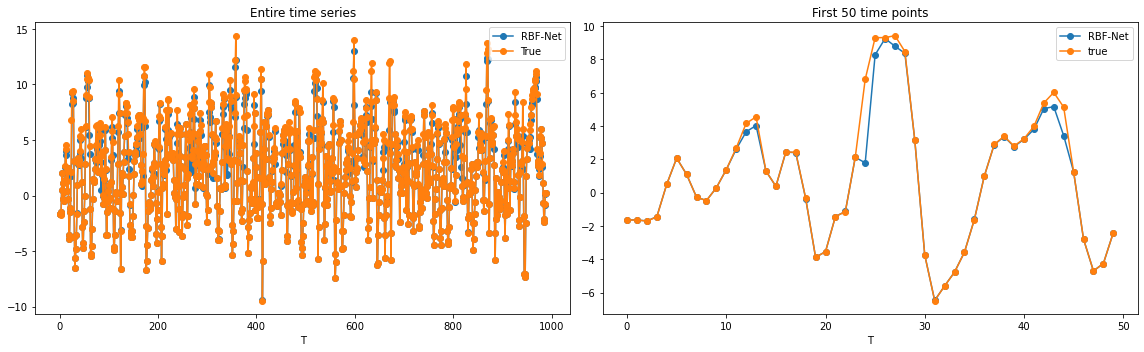

In [88]:
# Plot data
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))

axarr[0].plot(F_list_epoch[98],'-o', label='RBF-Net')
axarr[0].plot(Y,'-o', label='True')
axarr[0].set_xlabel('T')
axarr[0].set_title('Entire time series')
axarr[0].legend()

axarr[1].plot(F_list_epoch[98][:50],'-o', label='RBF-Net')
axarr[1].plot(Y[:50],'-o', label='true')
axarr[1].set_xlabel('T')
axarr[1].set_title('First 50 time points')
axarr[1].legend()
plt.tight_layout()
plt.show()

In [96]:
np.var(rbfnet.b)

2.38042709406636